# Pré-análise
* O arquivo de dados do radar do INEA segue a estrutura de dados do [padrão OPERA do EUMET](https://www.eumetnet.eu/wp-content/uploads/2019/05/OPERA-ODIM_H5-v2.01.pdf)
* O modo como o radar realiza o escaneamento (PPI mode) é apresentado neste notebook (TODO: Inserir link para o notebook da Rafaela Castro)

In [1]:
import os, sys

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('config/.env')

True

In [2]:
import numpy as np
import wradlib.georef as georef
import wradlib.io as io
import wradlib.util as util
import warnings
from src.utils.datalake import DataLakeWrapper

warnings.filterwarnings("ignore")

## Carregando o arquivo de dados

In [3]:
filename = "9921GUA-PPIVol-20160919-000015-0000.hdf"
dlc = DataLakeWrapper().get_client()
dlc.fget_object(
    bucket_name='landing',
    object_name=f'radar/inea/guaratiba/2016-09-19/{filename}',
    file_path=f'data/radar/{filename}'
)

In [4]:
pvol = io.read_opera_hdf5(f'data/radar/{filename}')
pvol['how'], pvol['what'], pvol['where']

({'BBC': b'False',
  'RXloss': 1.5,
  'TXloss': 1.5,
  'VPRCorr': b'False',
  'antgain': 45.0,
  'azmethod': b'AVERAGE',
  'beamwH': 1.0,
  'beamwV': 1.0,
  'binmethod': b'AVERAGE',
  'gasattn': 0.017000000923871994,
  'radomeloss': 0.0,
  'software': b'EDGE',
  'sw_version': b'6.5.1-5',
  'system': b'EEC-DWSR-93C',
  'task': b'Chuva_Severe',
  'wavelength': 10.710000991821289},
 {'date': b'20160919',
  'object': b'PVOL',
  'source': b'WMO:00000,RAD:,PLC:9921GUA,NOD:9921GUA,ORG:0,CTY:000,CMT:',
  'time': b'000015',
  'version': b'H5rad 2.1'},
 {'height': 120.0, 'lat': -22.993249893188477, 'lon': -43.58794021606445})

### Contando a quantidade de datasets

In [5]:
ntilt = 1
for i in range(100):
    try:
        pvol[f"dataset{ntilt}/what"]
        print(f"dataset{ntilt}/what")
        ntilt += 1
    except Exception:
        ntilt -= 1
        break
f"{ntilt} datasets found"

dataset1/what
dataset2/what
dataset3/what
dataset4/what
dataset5/what
dataset6/what
dataset7/what
dataset8/what
dataset9/what
dataset10/what
dataset11/what
dataset12/what
dataset13/what
dataset14/what


'14 datasets found'

In [6]:
pvol['dataset1/what'], pvol['dataset1/how'], pvol['dataset1/where']

({'enddate': b'20160919',
  'endtime': b'000052',
  'product': b'SCAN',
  'startdate': b'20160919',
  'starttime': b'000016'},
 {'CSR': 25.0,
  'Dclutter': b"'11'",
  'LOG': 2.0,
  'NEZ': 0.0,
  'NI': 48.195003509521484,
  'PAC': 0.0,
  'RAC': 0.0,
  'RXbandwidth': 1.0,
  'S2N': 2.0,
  'SQI': 30.0,
  'TXpower': array([1.49720062e-05, 1.49709739e-05, 1.49709739e-05, 1.49723514e-05,
         1.49723514e-05, 1.49713158e-05, 1.49713158e-05, 1.49720062e-05,
         1.49720062e-05, 1.49716610e-05, 1.49716610e-05, 1.49726967e-05,
         1.49726967e-05, 1.49716610e-05, 1.49716610e-05, 1.49716610e-05,
         1.49716610e-05, 1.49713158e-05, 1.49713158e-05, 1.49706287e-05,
         1.49706287e-05, 1.49706287e-05, 1.49706287e-05, 1.49713158e-05,
         1.49713158e-05, 1.49726967e-05, 1.49726967e-05, 1.49723514e-05,
         1.49723514e-05, 1.49709739e-05, 1.49709739e-05, 1.49716610e-05,
         1.49716610e-05, 1.49692481e-05, 1.49692481e-05, 1.49726967e-05,
         1.49726967e-05, 1.49730

In [7]:
pvol['dataset1/data1/what']
# pvol['dataset1/data1/how']    # not available
# pvol['dataset1/data1/where']  # not available

{'gain': 0.5,
 'nodata': 255.0,
 'offset': -32.0,
 'quantity': b'TH',
 'undetect': 0.0}

In [8]:
print(pvol['dataset1/data1/data'].shape)
pvol['dataset1/data1/data']

(308, 250)


array([[140,  75,  86, ...,   0,   0,   0],
       [142,  71,  76, ...,   0,   0,   0],
       [139,  69,  74, ...,   0,   0,   0],
       ...,
       [142, 111, 114, ...,   0,   0,   0],
       [146,  91, 102, ...,   0,   0,   0],
       [143,  81,  93, ...,   0,   0,   0]], dtype=uint8)

In [9]:
pvol['dataset14/where']

{'a1gate': 209,
 'elangle': 19.500732421875,
 'nbins': 250,
 'nrays': 257,
 'rscale': 500.0,
 'rstart': 0.0}

In [10]:
print(pvol['dataset14/data1/data'].shape)
pvol['dataset14/data1/data']

(257, 250)


array([[111, 122, 118, ...,   0,   0,   0],
       [112, 120, 115, ...,   0,   0,   0],
       [110, 117, 118, ...,   0,   0,   0],
       ...,
       [113, 117, 123, ...,   0,   0,   0],
       [112, 116, 120, ...,   0,   0,   0],
       [111, 120, 118, ...,   0,   0,   0]], dtype=uint8)

## Conclusão da análise da estrutura do arquivo de dados

De acordo com os testes acima, o padrão empregado no arquivo de dados do radar do INEA segue a seguinte estrutura

![pvol file structure](images/inea_radar_structure.png)

## Informações mais relevantes

### Datasets
* Cada arquivo contém 14 datasets {dataset1, dataset2, ..., dataset14}
* Cada dataset está relacionado a um ângulo de elevação que varia entre 0,5 e 19,5 graus aproximadamente
```python
    pvol['dataset1/where']['elangle']
```
* Cada dataset contém 11 produtos {data1, data2, ..., data11}
* A identificação de cada produto pode ser encontrada em
```python
    pvol['dataset1/data1/what']['quantity']
```
### Tabela de associação entre o nome do produto e a identificação

|Param|Description|
|-----|------|
|`data1`|TH|
|`data2`|TV|
|`data3`|DBZH|
|`data4`|DBZV|
|`data5`|ZDR|
|`data6`|RHOHV|
|`data7`|PHIDP|
|`data8`|SQI|
|`data9`|SNR|
|`data10`|VRAD|
|`data11`|WRAD|

### Coordenadas do radar
```python
    pvol["where"]["lon"]
    pvol["where"]["lat"]
    pvol["where"]["height"]
```
### Data e hora da aquisição (para cada dataset)
```python
    pvol['dataset1/what']['starttime']
    pvol['dataset1/what']['endtime']
    pvol['dataset1/what']['startdate']
    pvol['dataset1/what']['enddate']
```
### Modo da aquisição (para cada dataset)
```python
    pvol['dataset1/where']['elangle']
    pvol['dataset1/where']['nbins']
    pvol['dataset1/where']['nrays']
    pvol['dataset1/where']['rscale']
    pvol['dataset1/where']['rstart']
```
### Especificação do modo de aquisição
|Param|Type|Description|
|-----|-------|------|
|`elangle`|double|Antenna elevation angle (degrees) above the horizon.|
|`nbins`|long|Number of range bins in each ray|
|`nrays`|long|Number of azimuth gates (rays) in the object|
|`rscale`|double|The distance in meters between two successive range bins|
|`rstart`|double|The range (km) of the start of the first range bin|

# Pré-análise DBZH (data3), transformação para coordenadas geográficas
Fonte: https://docs.wradlib.org/en/stable/notebooks/georeferencing/wradlib_coords_example.html

In [1]:
import os, sys

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('config/.env')

True

In [2]:
import numpy as np
import wradlib.georef as georef
import wradlib.io as io
import wradlib.util as util
import warnings
from src.utils.datalake import DataLakeWrapper

warnings.filterwarnings("ignore")

## Carregando os dados

In [3]:
filename = "9921GUA-PPIVol-20160919-000015-0000.hdf"
dlc = DataLakeWrapper().get_client()
dlc.fget_object(
    bucket_name='landing',
    object_name=f'radar/inea/guaratiba/2016-09-19/{filename}',
    file_path=f'data/radar/{filename}'
)
pvol = io.read_opera_hdf5(f'data/radar/{filename}')

## Contando a quantidade de datasets

In [4]:
ntilt = 1
for i in range(100):
    try:
        pvol[f"dataset{ntilt}/what"]
        ntilt += 1
    except Exception:
        ntilt -= 1
        break
f"{ntilt} datasets found"

'14 datasets found'

## Scan geometry de cada dataset

In [5]:
scan_geometry = list()
for i in range(1,ntilt+1):
    nrays = int(pvol[f"dataset{i}/where"]["nrays"])
    nbins = int(pvol[f"dataset{i}/where"]["nbins"])
    rscale = int(pvol[f"dataset{i}/where"]["rscale"])
    scan_geometry.append(tuple([nrays, nbins, rscale]))
scan_geometry = dict(zip(range(1,ntilt+1), scan_geometry))
scan_geometry

{1: (308, 250, 500),
 2: (308, 250, 500),
 3: (308, 250, 500),
 4: (308, 250, 500),
 5: (308, 250, 500),
 6: (258, 250, 500),
 7: (256, 250, 500),
 8: (257, 250, 500),
 9: (257, 250, 500),
 10: (257, 250, 500),
 11: (256, 250, 500),
 12: (257, 250, 500),
 13: (257, 250, 500),
 14: (257, 250, 500)}

## Calculando as coordenadas geográficas (lat, lon)

In [6]:
sitecoords = (pvol["where"]["lon"], pvol["where"]["lat"], pvol["where"]["height"])
ppi_data = np.ndarray((0,4))
for tilt in range(1,ntilt+1):
    # scan_start_time = pvol[f"dataset{tilt}/what"]["starttime"]
    # scan_start_date = pvol[f"dataset{tilt}/what"]["startdate"]
    elangle = pvol[f"dataset{tilt}/where"]["elangle"]
    nrays = int(pvol[f"dataset{tilt}/where"]["nrays"])
    nbins = int(pvol[f"dataset{tilt}/where"]["nbins"])
    rscale = int(pvol[f"dataset{tilt}/where"]["rscale"])
    coord = np.empty((nrays, nbins, 3))
    coord[...] = georef.sweep_centroids(nrays, rscale, nbins, elangle)
    lon_lat_alt = georef.spherical_to_proj(
        coord[..., 0], 
        coord[..., 1], 
        coord[..., 2], 
        sitecoords
    )
    dbzh = pvol[f'dataset{tilt}/data3/data'].reshape(-1)
    data = np.column_stack((lon_lat_alt.reshape(-1, 3), dbzh))
    ppi_data = np.row_stack((ppi_data, data))
# scan_start_time, scan_start_date
ppi_data.shape

(963000, 4)

In [7]:
total = 0
for x,y,_ in scan_geometry.values():
    total += x*y
total

963000

In [8]:
ppi_data[:3].tolist()

[[-43.587915130863095, -22.990992775084415, 122.18477745912969, 83.0],
 [-43.587865395107585, -22.986478326804026, 126.57638954557478, 57.0],
 [-43.58781566270931, -22.981963880617737, 130.99741114862263, 0.0]]

In [9]:
ppi_data[-3:].tolist()

[[-43.60167487854885, -21.945090454742587, 42226.62658525072, 0.0],
 [-43.60172968420003, -21.940876283368034, 42399.969709496945, 0.0],
 [-43.60178448439824, -21.93666228085649, 42573.33858192153, 0.0]]

In [10]:
lon_min = np.min(ppi_data[:,0])
lon_max = np.max(ppi_data[:,0])
print(f'Min/Max longitude: {lon_min, lon_max}')

lat_min = np.min(ppi_data[:,1])
lat_max = np.max(ppi_data[:,1])
print(f'Min/Max latitude: {lat_min, lat_max}')

alt_min = np.round(np.min(ppi_data[:,2]) / 1000, 2)
alt_max = np.round(np.max(ppi_data[:,2]) / 1000, 2)
print(f'Min/Max altitude (km): {alt_min, alt_max}')

Min/Max longitude: (-44.80439032906937, -42.371489670930636)
Min/Max latitude: (-24.119298834573986, -21.867040208729073)
Min/Max altitude (km): (0.12, 42.57)


In [11]:
from src.data_classes.classes import RJCityArea as rj


print(rj.s_bound, rj.n_bound)
print(rj.w_bound, rj.e_bound)

-23.1339033365138 -22.649724748272934
-43.8906028271505 -43.04835145732227


> #### Nota
> 
> As coordenadas geográficas calculadas abrangem a cidade do Rio de Janeiro

In [12]:
# Math validation
def radar_beam_altitude(elevation_angle, radar_beam_range):
    return radar_beam_range * np.sin(np.deg2rad(elevation_angle))


def radar_beam_horizontal_range(elevation_angle, radar_beam_range):
    return radar_beam_range * np.cos(np.deg2rad(elevation_angle))


def print_radar_ranges(elevation_angle, radar_beam_range):
    print(f'Elevation {elevation_angle} degrees', 'ALT:', radar_beam_altitude(elevation_angle, radar_beam_range), 'DIST:', radar_beam_horizontal_range(elevation_angle, radar_beam_range))

print_radar_ranges(0.5, 125)
print_radar_ranges(19.5, 125)

Elevation 0.5 degrees ALT: 1.0908169372967418 DIST: 124.99524038302141
Elevation 19.5 degrees ALT: 41.725857404221365 DIST: 117.8301863865223


> #### Nota
> 
> As altitudes calculadas parecem estar consistentes com a validação matemática realizada

## Staging file


In [13]:
np.save('data/radar/ppi_data.npy', ppi_data)

In [14]:
import sys

print(f'pvol: {sys.getsizeof(pvol)}, {type(pvol)}')
print(f'ppi_data: {sys.getsizeof(ppi_data)}, {type(ppi_data)}')

pvol: 13056, <class 'dict'>
ppi_data: 30816128, <class 'numpy.ndarray'>


> #### Nota
> 
> O armazenamento dos dados em formato numpy aumenta significativamente o tamanho do arquivo
>
> Considerar armazenar em formato Xarray

## Visualização dos dados

In [1]:
import os, sys

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('config/.env')

True

In [2]:
import sys
import numpy as np
import pandas as pd


ppi_data = np.load('data/radar/ppi_data.npy')
ddf = pd.DataFrame(ppi_data, columns=['lon', 'lat', 'alt', 'dbzh'])
ddf

lon        lat           alt  dbzh
0      -43.587915 -22.990993    122.184777  83.0
1      -43.587865 -22.986478    126.576390  57.0
2      -43.587816 -22.981964    130.997411   0.0
3      -43.587766 -22.977449    135.447842  72.0
4      -43.587716 -22.972935    139.927683  64.0
...           ...        ...           ...   ...
962995 -43.601565 -21.953519  41880.017588   0.0
962996 -43.601620 -21.949305  42053.309211   0.0
962997 -43.601675 -21.945090  42226.626585   0.0
962998 -43.601730 -21.940876  42399.969709   0.0
962999 -43.601784 -21.936662  42573.338582   0.0

[963000 rows x 4 columns]

In [3]:
ddf['alt'].nunique()

3500

In [4]:
ddf.describe()

lon            lat            alt           dbzh
count  963000.000000  963000.000000  963000.000000  963000.000000
mean      -43.587940     -22.992478    8662.067176      17.303559
std         0.490338       0.453943    8557.035060      36.912657
min       -44.804390     -24.119299     122.184777       0.000000
25%       -43.898130     -23.279541    2138.301582       0.000000
50%       -43.587940     -22.993595    5752.174696       0.000000
75%       -43.277750     -22.705156   12374.037115       0.000000
max       -42.371490     -21.867040   42573.338582     162.000000

In [5]:
print(f'Unique values in lon: {ddf["lon"].nunique()}')
print(f'Unique values in lat: {ddf["lat"].nunique()}')
print(f'Unique values in alt: {ddf["alt"].nunique()}')

Unique values in lon: 961501
Unique values in lat: 631503
Unique values in alt: 3500


In [6]:
250 * 14

3500

> #### Nota
> 
> A quantidade única de valores de altitude coincide com a quantidade de ranges (bins) do radar vezes o número de datasets.
>
> Isso parece correto, já que devido a elevação do radar, cada medição ocorre em uma altitude diferente.

In [7]:
altitudes = sorted(ddf['alt'].unique())[:2]  # [122.18477745912969, 126.5463136844337]
c1 = ddf['alt'] >= altitudes[0]
c2 = ddf['alt'] < altitudes[1]
ddf[c1 & c2]

lon        lat         alt  dbzh
0     -43.587915 -22.990993  122.184777  83.0
250   -43.587865 -22.990994  122.184777   0.0
500   -43.587816 -22.990996  122.184777   0.0
750   -43.587766 -22.990998  122.184777   0.0
1000  -43.587716 -22.991002  122.184777   0.0
...          ...        ...         ...   ...
75750 -43.588164 -22.991002  122.184777  88.0
76000 -43.588114 -22.990998  122.184777  86.0
76250 -43.588064 -22.990996  122.184777   0.0
76500 -43.588015 -22.990994  122.184777   0.0
76750 -43.587965 -22.990993  122.184777  85.0

[308 rows x 4 columns]

In [8]:
altitudes = sorted(ddf['alt'].unique())[-2:]  # [42399.969709496945, 42573.33858192153]
c1 = ddf['alt'] >= altitudes[0]
c2 = ddf['alt'] < altitudes[1]
ddf[c1 & c2]

lon        lat           alt  dbzh
898998 -43.574150 -21.940876  42399.969709   0.0
899248 -43.546579 -21.941501  42399.969709   0.0
899498 -43.519032 -21.942749  42399.969709   0.0
899748 -43.491525 -21.944620  42399.969709   0.0
899998 -43.464074 -21.947113  42399.969709   0.0
...           ...        ...           ...   ...
961998 -43.711806 -21.947113  42399.969709   0.0
962248 -43.684355 -21.944620  42399.969709   0.0
962498 -43.656848 -21.942749  42399.969709   0.0
962748 -43.629301 -21.941501  42399.969709   0.0
962998 -43.601730 -21.940876  42399.969709   0.0

[257 rows x 4 columns]

> #### Nota
> 
> A quantidade de registros esperada para a maior altitude é consistente com a quantidade de bins do maior ângulo de elevação do radar.

In [9]:
altitudes = sorted(ddf['alt'].unique())[:2]  # [122.18477745912969, 126.5463136844337]
c1 = ddf['alt'] >= altitudes[0]
c2 = ddf['alt'] < altitudes[1]
ddf[c1 & c2]

lon        lat         alt  dbzh
0     -43.587915 -22.990993  122.184777  83.0
250   -43.587865 -22.990994  122.184777   0.0
500   -43.587816 -22.990996  122.184777   0.0
750   -43.587766 -22.990998  122.184777   0.0
1000  -43.587716 -22.991002  122.184777   0.0
...          ...        ...         ...   ...
75750 -43.588164 -22.991002  122.184777  88.0
76000 -43.588114 -22.990998  122.184777  86.0
76250 -43.588064 -22.990996  122.184777   0.0
76500 -43.588015 -22.990994  122.184777   0.0
76750 -43.587965 -22.990993  122.184777  85.0

[308 rows x 4 columns]

In [10]:
import folium
from folium.plugins import HeatMap

In [11]:
df_ = ddf[c1 & c2].copy()
df_.drop('alt', inplace=True, axis=1)
df_ = df_[['lat', 'lon', 'dbzh']]
df_

lat        lon  dbzh
0     -22.990993 -43.587915  83.0
250   -22.990994 -43.587865   0.0
500   -22.990996 -43.587816   0.0
750   -22.990998 -43.587766   0.0
1000  -22.991002 -43.587716   0.0
...          ...        ...   ...
75750 -22.991002 -43.588164  88.0
76000 -22.990998 -43.588114  86.0
76250 -22.990996 -43.588064   0.0
76500 -22.990994 -43.588015   0.0
76750 -22.990993 -43.587965  85.0

[308 rows x 3 columns]

In [12]:
df_['dbzh'].describe()

count    308.000000
mean      87.464286
std       22.854347
min        0.000000
25%       83.000000
50%       96.000000
75%      100.000000
max      109.000000
Name: dbzh, dtype: float64

In [13]:
figure = folium.Figure(width=1200, height=700)
map = folium.Map(
    [-22.925, -43.489], 
    zoom_start=10.5,
    min_zoom=8, 
    tiles='cartodbpositron',
).add_to(figure)
folium.LatLngPopup().add_to(map)
HeatMap(df_).add_to(map)
map

# Demonstração de carga de dados otimizados com Dask

https://docs.dask.org/en/stable/dataframe-best-practices.html

In [1]:
import os, sys, warnings

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('config/.env')

warnings.filterwarnings("ignore")

In [2]:
import sys
import pandas as pd
import dask.dataframe as dd
from src.utils.datalake import DataLakeWrapper

## Carregando e filtrando dados de forma _lazy_

In [3]:
ddf = dd.read_parquet(
    path='s3://staged/radar/inea/guaratiba', 
    filesystem=DataLakeWrapper().get_filesystem(),
    engine='pyarrow',
)
print(type(ddf))
ddf

<class 'dask.dataframe.core.DataFrame'>


Dask DataFrame Structure:
              longitude latitude altitude horizontal_reflectivity        datetime             year            month              day
npartitions=5                                                                                                                       
                float64  float64  float64                 float64  datetime64[ns]  category[known]  category[known]  category[known]
                    ...      ...      ...                     ...             ...              ...              ...              ...
...                 ...      ...      ...                     ...             ...              ...              ...              ...
                    ...      ...      ...                     ...             ...              ...              ...              ...
                    ...      ...      ...                     ...             ...              ...              ...              ...
Dask Name: read-parquet, 1 graph layer

In [4]:
sys.getsizeof(ddf)

56

In [5]:
print('Number of rows: ', ddf.shape[0].compute())

Number of rows:  13500000


> #### Nota
>
> O processamento dos dados com Dask é realizado de forma _lazy_, ou seja, os dados são carregados e processados de forma sequencial, mas não são armazenados em memória.
>
> A variável que representa o dask dataframe (`ddf`) ocupa apenas 56 bytes em memória RAM, apesar de fazer referência à 13,5 milhões de registros.

In [5]:
ddf['datetime'].dt.date.unique().compute()

0    2020-09-20
1    2020-09-21
2    2020-09-22
3    2020-10-29
4    2021-02-04
Name: datetime, dtype: object

In [6]:
ddf = ddf[
    (ddf['year'] == 2020) & 
    (ddf['month'] == 9) & 
    (ddf['day'] == 20)
]
ddf = ddf[ddf['altitude'] <= 3000]
ddf = ddf[['latitude', 'longitude', 'altitude', 'horizontal_reflectivity', 'datetime']]
ddf[['latitude', 'longitude']] = ddf[['latitude', 'longitude']].round(3)
ddf['altitude'] = ddf['altitude'].round(0)

print(type(ddf))
print('Size: ', sys.getsizeof(ddf))

<class 'dask.dataframe.core.DataFrame'>
Size:  56


In [8]:
print('Number of rows: ', ddf.shape[0].compute())

Number of rows:  1816560


> #### Nota
>
> É uma boa prática filtrar os dados com Dask para depois operá-los com Pandas.
>
> O dataset foi reduzido de 13,5 milhões de registros para 1,8 milhão de registros em poucos segundos em 0.1s e sem _overhead_ de memória RAM.

In [10]:
result = ddf.head()
print(type(result))
result

<class 'pandas.core.frame.DataFrame'>


latitude  longitude  altitude  horizontal_reflectivity            datetime
0   -22.992    -43.588       124                     94.0 2020-09-20 00:00:15
1   -22.990    -43.588       126                     80.0 2020-09-20 00:00:15
2   -22.988    -43.588       128                     30.0 2020-09-20 00:00:15
3   -22.985    -43.588       131                      0.0 2020-09-20 00:00:15
4   -22.983    -43.588       133                      0.0 2020-09-20 00:00:15

> #### Nota
>
> Alguns comandos do Dask não permitem manter o processamento de forma _lazy_.
>
> No exemplo acima o comando `head()` retorna um pandas dataframe.

In [7]:
df = ddf.sample(frac=0.1, random_state=7).compute()
df

latitude  longitude  altitude  horizontal_reflectivity  \
1789555   -22.891    -43.664    1633.0                     44.0   
1653007   -23.004    -43.602     295.0                      0.0   
2695552   -22.879    -43.620    1551.0                     43.0   
1471595   -22.785    -43.646    1552.0                      0.0   
2210470   -23.149    -43.554     879.0                      0.0   
...           ...        ...       ...                      ...   
2079016   -23.029    -43.601     232.0                     26.0   
2208500   -23.422    -43.433    2370.0                      0.0   
834689    -23.153    -43.456    2569.0                      0.0   
2233863   -23.050    -43.730     803.0                      0.0   
1841646   -22.955    -43.233     521.0                      0.0   

                   datetime  
1789555 2020-09-20 00:09:00  
1653007 2020-09-20 00:08:27  
2695552 2020-09-20 00:14:00  
1471595 2020-09-20 00:07:15  
2210470 2020-09-20 00:11:35  
...                     ...  
2079016 2020-09-20 00:10:55  
2208500 2020-09-20 00:11:35  
834689  2020-09-20 00:04:00  
2233863 2020-09-20 00:11:35  
1841646 2020-09-20 00:10:15  

[181656 rows x 5 columns]

> #### Nota
>
> `frac`: parâmetro que define a fração aproximada de itens a serem devolvidos. 
>
> Essa fração de amostragem é aplicada igualmente a todas as partições.

In [12]:
df[df.duplicated(subset=['latitude', 'longitude', 'altitude'])]

latitude  longitude  altitude  horizontal_reflectivity  \
192224    -22.532    -43.362      1777                      0.0   
1035569   -22.989    -43.757       292                      0.0   
2275208   -22.976    -43.579       247                      0.0   
465301    -22.990    -43.588       139                     27.0   
2320883   -23.181    -43.576      1369                      0.0   
...           ...        ...       ...                      ...   
475203    -22.986    -43.584       174                      0.0   
1201536   -23.030    -43.668       367                     28.0   
1146319   -23.479    -43.012      2588                      0.0   
117002    -22.997    -43.593       128                      0.0   
254757    -23.494    -43.268      2051                      0.0   

                   datetime  
192224  2020-09-20 00:00:55  
1035569 2020-09-20 00:05:16  
2275208 2020-09-20 00:12:15  
465301  2020-09-20 00:01:35  
2320883 2020-09-20 00:12:15  
...                     ...  
475203  2020-09-20 00:02:14  
1201536 2020-09-20 00:05:55  
1146319 2020-09-20 00:05:55  
117002  2020-09-20 00:00:15  
254757  2020-09-20 00:00:55  

[21324 rows x 5 columns]

In [8]:
df[['latitude', 'longitude', 'altitude']].nunique().sort_values()

altitude     1328
latitude     2245
longitude    2426
dtype: int64

In [10]:
df = df.set_index(['altitude', 'latitude', 'longitude', 'datetime'])
df

horizontal_reflectivity
altitude latitude longitude datetime                                    
1633.0   -22.891  -43.664   2020-09-20 00:09:00                     44.0
295.0    -23.004  -43.602   2020-09-20 00:08:27                      0.0
1551.0   -22.879  -43.620   2020-09-20 00:14:00                     43.0
1552.0   -22.785  -43.646   2020-09-20 00:07:15                      0.0
879.0    -23.149  -43.554   2020-09-20 00:11:35                      0.0
...                                                                  ...
232.0    -23.029  -43.601   2020-09-20 00:10:55                     26.0
2370.0   -23.422  -43.433   2020-09-20 00:11:35                      0.0
2569.0   -23.153  -43.456   2020-09-20 00:04:00                      0.0
803.0    -23.050  -43.730   2020-09-20 00:11:35                      0.0
521.0    -22.955  -43.233   2020-09-20 00:10:15                      0.0

[181656 rows x 1 columns]

In [11]:
df.groupby([
    pd.Grouper(level='altitude'),
    pd.Grouper(level='latitude'),
    pd.Grouper(level='longitude'),
    pd.Grouper(level='datetime', freq='15T')
]).mean()

horizontal_reflectivity
altitude latitude longitude datetime                           
124.0    -22.994  -43.589   2020-09-20                68.857143
                  -43.588   2020-09-20                73.900000
                  -43.587   2020-09-20                73.785714
         -22.993  -43.589   2020-09-20                74.466667
                  -43.587   2020-09-20                64.789474
...                                                         ...
2996.0   -22.172  -43.642   2020-09-20                 0.000000
                  -43.626   2020-09-20                 0.000000
         -22.171  -43.611   2020-09-20                 0.000000
                  -43.596   2020-09-20                 0.000000
                  -43.580   2020-09-20                 0.000000

[160332 rows x 1 columns]

# Demonstração de carga de dados agregados com Dask

In [1]:
import os, sys, warnings

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('config/.env')

warnings.filterwarnings("ignore")

In [2]:
import dask.dataframe as dd
from src.utils.datalake import DataLakeWrapper

In [3]:
ddf = dd.read_parquet(
    path='s3://staged/radar/inea/guaratiba_agg', 
    filesystem=DataLakeWrapper().get_filesystem(),
    engine='pyarrow',
)
print('Number of rows: ', ddf.shape[0].compute())

Number of rows:  409272


In [4]:
df = ddf.compute()
df

datetime  latitude  longitude  altitude  \
0      2019-02-16 00:00:00    -22.99     -43.59         0   
1      2019-02-16 00:00:00    -22.98     -43.59         0   
2      2019-02-16 00:00:00    -22.97     -43.59         0   
3      2019-02-16 00:00:00    -22.96     -43.59         0   
4      2019-02-16 00:00:00    -22.95     -43.59         0   
...                    ...       ...        ...       ...   
409267 2019-02-16 23:00:00    -22.65     -43.60         4   
409268 2019-02-16 23:00:00    -22.68     -43.59         4   
409269 2019-02-16 23:00:00    -22.67     -43.59         4   
409270 2019-02-16 23:00:00    -22.66     -43.59         4   
409271 2019-02-16 23:00:00    -22.65     -43.59         4   

        horizontal_reflectivity_min  horizontal_reflectivity_max  \
0                               0.0                        122.0   
1                               0.0                        118.0   
2                               0.0                        110.0   
3                               0.0                        158.0   
4                               0.0                        107.0   
...                             ...                          ...   
409267                          0.0                         60.0   
409268                          0.0                         57.0   
409269                          0.0                         63.0   
409270                          0.0                         63.0   
409271                          0.0                         60.0   

        horizontal_reflectivity_sum  horizontal_reflectivity_mean  \
0                         3062152.0                     48.448706   
1                           80832.0                      5.708475   
2                           72738.0                      7.624528   
3                          111623.0                     21.092782   
4                          152280.0                     32.875648   
...                             ...                           ...   
409267                        978.0                     22.227273   
409268                        265.0                     24.090909   
409269                       1248.0                     28.363636   
409270                       1237.0                     22.490909   
409271                        331.0                     15.045455   

        horizontal_reflectivity_std  horizontal_reflectivity_count  year  \
0                         38.016906                          63204  2019   
1                         15.291518                          14160  2019   
2                         16.117444                           9540  2019   
3                         24.188533                           5292  2019   
4                         27.238854                           4632  2019   
...                             ...                            ...   ...   
409267                    27.129203                             44  2019   
409268                    27.919364                             11  2019   
409269                    27.787475                             44  2019   
409270                    26.963537                             55  2019   
409271                    25.253905                             22  2019   

       month day  
0          2  16  
1          2  16  
2          2  16  
3          2  16  
4          2  16  
...      ...  ..  
409267     2  16  
409268     2  16  
409269     2  16  
409270     2  16  
409271     2  16  

[409272 rows x 13 columns]

In [5]:
df.datetime.unique()

array(['2019-02-16T00:00:00.000000000', '2019-02-16T01:00:00.000000000',
       '2019-02-16T02:00:00.000000000', '2019-02-16T03:00:00.000000000',
       '2019-02-16T04:00:00.000000000', '2019-02-16T05:00:00.000000000',
       '2019-02-16T06:00:00.000000000', '2019-02-16T07:00:00.000000000',
       '2019-02-16T08:00:00.000000000', '2019-02-16T09:00:00.000000000',
       '2019-02-16T10:00:00.000000000', '2019-02-16T11:00:00.000000000',
       '2019-02-16T12:00:00.000000000', '2019-02-16T13:00:00.000000000',
       '2019-02-16T14:00:00.000000000', '2019-02-16T15:00:00.000000000',
       '2019-02-16T16:00:00.000000000', '2019-02-16T17:00:00.000000000',
       '2019-02-16T18:00:00.000000000', '2019-02-16T19:00:00.000000000',
       '2019-02-16T20:00:00.000000000', '2019-02-16T21:00:00.000000000',
       '2019-02-16T22:00:00.000000000', '2019-02-16T23:00:00.000000000'],
      dtype='datetime64[ns]')

# Análise Exploratória

In [2]:
import os, sys, warnings

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('config/.env')

warnings.filterwarnings("ignore")

True

In [3]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import dask.dataframe as dd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point
import geopandas as gpd
import folium

from src.utils.datalake import DataLakeWrapper

In [3]:
remote_path = 'staged/radar/inea/guaratiba_agg/'
filters = [
    ('year', '==', 2016), 
    ('month', '==', 9),
    ('day', '==', 19),
]
table = pq.read_table(
    remote_path,
    filters=filters,
    filesystem=DataLakeWrapper().get_filesystem(),
)
table.schema

datetime: timestamp[us]
latitude: double
longitude: double
altitude: int64
horizontal_reflectivity_min: double
horizontal_reflectivity_max: double
horizontal_reflectivity_sum: double
horizontal_reflectivity_mean: double
horizontal_reflectivity_std: double
horizontal_reflectivity_count: int64
year: dictionary<values=int32, indices=int32, ordered=0>
month: dictionary<values=int32, indices=int32, ordered=0>
day: dictionary<values=int32, indices=int32, ordered=0>
-- schema metadata --
naming_authority: 'INEA - Instituto Estadual do Ambiente'
timezone: 'UTC'
instrument: 'radar'
variable_1: 'longitude (degrees)'
variable_2: 'latitude (degrees)'
variable_3: 'altitude (metres)'
variable_4: 'horizontal reflectivity (dBZ)'

In [4]:
df = table.to_pandas()
df

datetime  latitude  longitude  altitude  \
0       2016-09-19 00:00:00    -22.99     -43.59         0   
1       2016-09-19 00:00:00    -22.98     -43.59         0   
2       2016-09-19 00:00:00    -22.97     -43.59         0   
3       2016-09-19 00:00:00    -22.96     -43.59         0   
4       2016-09-19 00:00:00    -22.95     -43.59         0   
...                     ...       ...        ...       ...   
1001653 2016-09-19 23:00:00    -22.65     -43.88         0   
1001654 2016-09-19 23:00:00    -22.65     -43.18         0   
1001655 2016-09-19 23:00:00    -22.70     -43.05         0   
1001656 2016-09-19 23:00:00    -22.66     -43.12         0   
1001657 2016-09-19 23:00:00    -22.79     -43.05         0   

         horizontal_reflectivity_min  horizontal_reflectivity_max  \
0                                0.0                        134.0   
1                                0.0                        132.0   
2                                0.0                        127.0   
3                                0.0                        120.0   
4                                0.0                        118.0   
...                              ...                          ...   
1001653                          0.0                          0.0   
1001654                          0.0                          0.0   
1001655                          0.0                          0.0   
1001656                          0.0                          0.0   
1001657                          0.0                          0.0   

         horizontal_reflectivity_sum  horizontal_reflectivity_mean  \
0                          1931391.0                     77.101437   
1                           440124.0                     80.682676   
2                           257253.0                     82.931335   
3                           175927.0                     77.535037   
4                           101640.0                     80.666667   
...                              ...                           ...   
1001653                          0.0                      0.000000   
1001654                          0.0                      0.000000   
1001655                          0.0                      0.000000   
1001656                          0.0                      0.000000   
1001657                          0.0                      0.000000   

         horizontal_reflectivity_std  horizontal_reflectivity_count  year  \
0                          26.677434                          25050  2016   
1                          34.804445                           5455  2016   
2                          31.305716                           3102  2016   
3                          36.385517                           2269  2016   
4                          30.069366                           1260  2016   
...                              ...                            ...   ...   
1001653                          NaN                              1  2016   
1001654                          NaN                              1  2016   
1001655                          NaN                              1  2016   
1001656                          NaN                              1  2016   
1001657                          NaN                              1  2016   

        month day  
0           9  19  
1           9  19  
2           9  19  
3           9  19  
4           9  19  
...       ...  ..  
1001653     9  19  
1001654     9  19  
1001655     9  19  
1001656     9  19  
1001657     9  19  

[1001658 rows x 13 columns]

## Geopoints

In [5]:
df['altitude'].value_counts()

0     99751
1     99108
2     98240
3     95875
4     92427
5     87047
6     79743
7     70116
8     57522
9     48672
10    37512
11    32613
12    24271
13    20634
14    15596
15    10662
16    10171
17     7122
18     5370
19     4464
20     2485
21     1257
22      716
23      273
24       11
Name: altitude, dtype: int64

In [6]:
df.query('altitude == 0 & datetime == "2016-09-19 00:00:00"')

datetime  latitude  longitude  altitude  horizontal_reflectivity_min  \
0     2016-09-19    -22.99     -43.59         0                          0.0   
1     2016-09-19    -22.98     -43.59         0                          0.0   
2     2016-09-19    -22.97     -43.59         0                          0.0   
3     2016-09-19    -22.96     -43.59         0                          0.0   
4     2016-09-19    -22.95     -43.59         0                          0.0   
...          ...       ...        ...       ...                          ...   
41866 2016-09-19    -22.65     -43.18         0                          0.0   
41867 2016-09-19    -22.66     -43.12         0                          0.0   
41868 2016-09-19    -22.70     -43.05         0                          0.0   
41869 2016-09-19    -22.79     -43.05         0                          0.0   
41870 2016-09-19    -22.65     -43.88         0                         54.0   

       horizontal_reflectivity_max  horizontal_reflectivity_sum  \
0                            134.0                    1931391.0   
1                            132.0                     440124.0   
2                            127.0                     257253.0   
3                            120.0                     175927.0   
4                            118.0                     101640.0   
...                            ...                          ...   
41866                          0.0                          0.0   
41867                          0.0                          0.0   
41868                          0.0                          0.0   
41869                          0.0                          0.0   
41870                         54.0                         54.0   

       horizontal_reflectivity_mean  horizontal_reflectivity_std  \
0                         77.101437                    26.677434   
1                         80.682676                    34.804445   
2                         82.931335                    31.305716   
3                         77.535037                    36.385517   
4                         80.666667                    30.069366   
...                             ...                          ...   
41866                      0.000000                          NaN   
41867                      0.000000                          NaN   
41868                      0.000000                          NaN   
41869                      0.000000                          NaN   
41870                     54.000000                          NaN   

       horizontal_reflectivity_count  year month day  
0                              25050  2016     9  19  
1                               5455  2016     9  19  
2                               3102  2016     9  19  
3                               2269  2016     9  19  
4                               1260  2016     9  19  
...                              ...   ...   ...  ..  
41866                              1  2016     9  19  
41867                              1  2016     9  19  
41868                              1  2016     9  19  
41869                              1  2016     9  19  
41870                              1  2016     9  19  

[4159 rows x 13 columns]

In [7]:
df.query('altitude == 24 & datetime == "2016-09-19 00:00:00"')

datetime  latitude  longitude  altitude  horizontal_reflectivity_min  \
41767 2016-09-19    -22.65     -43.05        24                          0.0   

       horizontal_reflectivity_max  horizontal_reflectivity_sum  \
41767                          0.0                          0.0   

       horizontal_reflectivity_mean  horizontal_reflectivity_std  \
41767                           0.0                          0.0   

       horizontal_reflectivity_count  year month day  
41767                              2  2016     9  19

> #### Nota
>
> Há mais pontos de observação em altitudes menores.
>
> Isso é consistente, já que as as regiões mais próximas do radar necessitam de um ângulo de elevação muito alto para ser capaz de observar altitudes maiores.
>
> * A imagem abaixo apresenta a relação entre a altitude e o ângulo de elevação do radar.
> 
> ![radar elevation altitudes](images/radar_elevation_altitude.jpg)

### Pontos observados em baixa altitude

In [17]:
unique_coords = df.query('altitude == 0 & datetime == "2016-09-19 00:00:00"')[['latitude', 'longitude']].drop_duplicates()
geometry = [Point(xy) for xy in zip(unique_coords['longitude'], unique_coords['latitude'])]
gdf = gpd.GeoDataFrame(unique_coords, geometry=geometry, crs='EPSG:4326')
gdf

latitude  longitude                     geometry
0        -22.99     -43.59  POINT (-43.59000 -22.99000)
1        -22.98     -43.59  POINT (-43.59000 -22.98000)
2        -22.97     -43.59  POINT (-43.59000 -22.97000)
3        -22.96     -43.59  POINT (-43.59000 -22.96000)
4        -22.95     -43.59  POINT (-43.59000 -22.95000)
...         ...        ...                          ...
41866    -22.65     -43.18  POINT (-43.18000 -22.65000)
41867    -22.66     -43.12  POINT (-43.12000 -22.66000)
41868    -22.70     -43.05  POINT (-43.05000 -22.70000)
41869    -22.79     -43.05  POINT (-43.05000 -22.79000)
41870    -22.65     -43.88  POINT (-43.88000 -22.65000)

[4159 rows x 3 columns]

In [22]:
map = folium.Map(
    location=[-22.891814, -43.469477], 
    zoom_start=10,
)
# folium.GeoJson(gdf).add_to(map)
for i, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color='blue',
        fill_color='blue'
    ).add_to(map)
map

### Pontos observados a cada range de altitude

In [10]:
remote_path = os.path.join('landing', 'meshes', 'alertario', 'rainfall_zones', 'zonas_pluviometricas_rj_shapefile') 
local_dir = os.path.join('data', 'radar')
objects = DataLakeWrapper().download_files_recursively(remote_path, local_dir)
objects

['data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.cpg',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.dbf',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.prj',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.shp',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.shx']

In [11]:
shapefile = [f for f in objects if f.endswith('.shp')][0]
rj_city = gpd.read_file(shapefile)
rj_city = rj_city.to_crs(epsg=4674)

def plot_rj_city(plt_args={}):
    fig, ax = plt.subplots()
    rj_city.plot(
        ax=ax,
        alpha=1,
        **plt_args
    )
    return fig, ax

def get_gdf(df):
    unique_coords = df[['latitude', 'longitude']].drop_duplicates()
    geometry = [Point(xy) for xy in zip(unique_coords['longitude'], unique_coords['latitude'])]
    gdf = gpd.GeoDataFrame(unique_coords, geometry=geometry, crs='EPSG:4674')
    return gdf

In [23]:
figures_path = 'data/radar/figures/geopoints'
os.makedirs(figures_path, exist_ok=True)
plt_args = {
    'color': 'lightgrey',
    'edgecolor': 'blue',
    'linewidth': 0.5,
}
hour = '2016-09-19 00:00:00'
for altitude in list(range(25)):
    fig, ax = plot_rj_city(plt_args)
    gdf = get_gdf(df.query(f'altitude == {altitude} & datetime == "{hour}"'))
    gdf.plot(
        ax=ax, 
        markersize=5, 
        alpha=0.3,
        color='blue'
    )
    ax.set_title(f'Datetime: {hour} / Altitude={altitude+1} km')
    fig.tight_layout()
    fig.savefig(f'{figures_path}/up_to_{str(altitude+1).zfill(2)}.png', dpi=300)
    plt.close(fig)

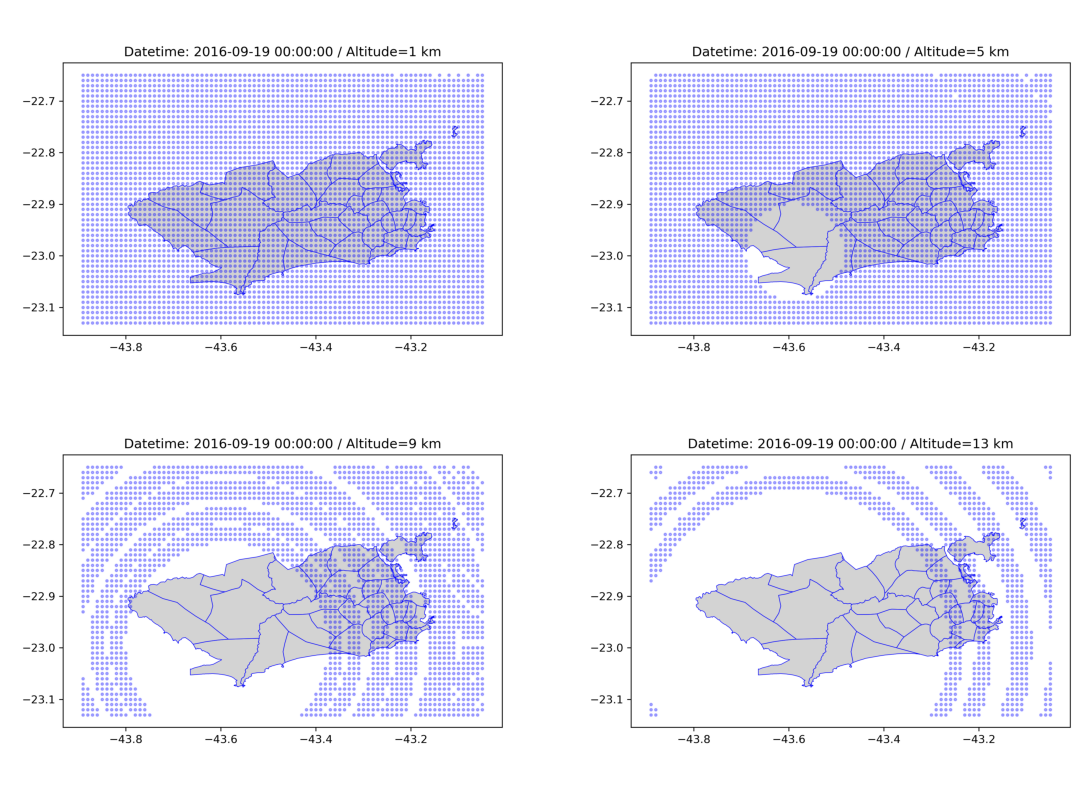

In [24]:
figures = sorted(os.listdir(figures_path))
figures = [figures[i] for i in [0,4,8,12]]
fig, axes = plt.subplots(2,2, figsize=(12,8))
for figure, ax in zip(figures, axes.flatten()):
    ax.imshow(mpimg.imread(os.path.join(figures_path, figure)))
    ax.set_axis_off()
fig.tight_layout()

> #### Nota
> 
> Cada ponto azul representa um par (latitude, longitude) observado pelo radar.
> 
> As regiões mais próximas do radar não são observadas em altitudes maiores.

## Refletividade

In [27]:
def get_gdf(df):
    reflectivity = df[['latitude', 'longitude', 'horizontal_reflectivity_mean']].groupby(['latitude', 'longitude']).mean().reset_index()
    geometry = [Point(xy) for xy in zip(reflectivity['longitude'], reflectivity['latitude'])]
    gdf = gpd.GeoDataFrame(reflectivity, geometry=geometry, crs='EPSG:4674')
    return gdf

In [28]:
figures_path = 'data/radar/figures/reflectivity'
os.makedirs(figures_path, exist_ok=True)
hours = pd.date_range('2016-09-19 00:00:00', '2016-09-19 23:00:00', freq='1H')
altitude = 0
vmin, vmax = df['horizontal_reflectivity_mean'].min(), df['horizontal_reflectivity_mean'].max()
colors = ["blue", "green", "yellow", "red", "purple"]
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
for hour in hours:
    fig, ax = plot_rj_city(plt_args)
    df_tmp = df.query(f'altitude == {altitude} & datetime == "{hour}"')
    gdf = get_gdf(df_tmp)
    gdf.plot(
        column='horizontal_reflectivity_mean',
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        ax=ax,
        alpha=0.2,
        legend=True, 
        legend_kwds={'label': "Refletividade (dBZ)"}
    )
    # plt.colorbar(ax.get_children()[1], ax=ax, shrink=0.5, colors=colors, vmin=vmin, vmax=vmax)
    fig.tight_layout()
    ax.set_title(f'Datetime: {hour.strftime("%Y-%m-%d %H:%M:%S")} / Altitude=1 km')
    fig.savefig(f'{figures_path}/reflectivity_at_{hour.strftime("%H")}h.png', dpi=300)
    plt.close(fig)

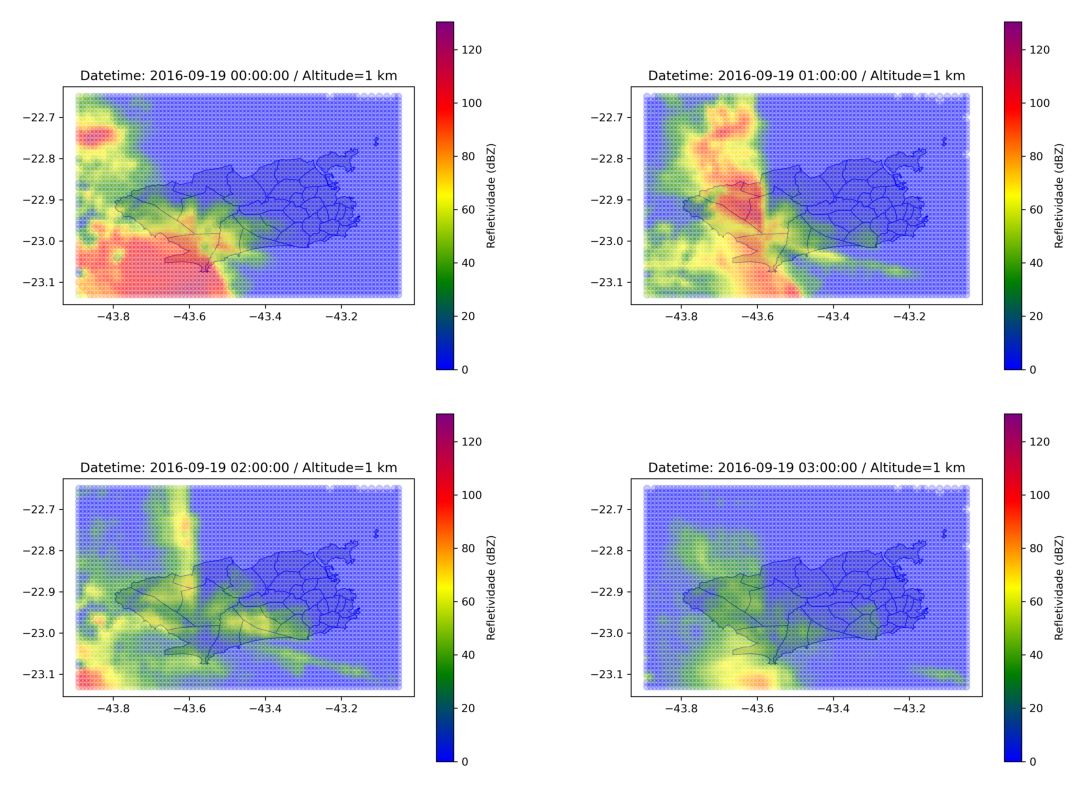

In [31]:
figures = sorted(os.listdir(figures_path))
figures = [figures[i] for i in range(4)]
fig, axes = plt.subplots(2,2, figsize=(12,8))
for figure, ax in zip(figures, axes.flatten()):
    ax.imshow(mpimg.imread(os.path.join(figures_path, figure)))
    ax.set_axis_off()
fig.tight_layout()

## Análise de dados duplicados

In [6]:
path = 'staged/radar/inea/guaratiba_agg/'
columns = ['datetime', 'latitude', 'longitude', 'altitude', 'horizontal_reflectivity_mean']
df = pq.read_table(
    path,
    columns=columns,
    filesystem=DataLakeWrapper().get_filesystem(),
).to_pandas()
df

datetime  latitude  longitude  altitude  \
0         2016-11-12 00:00:00    -23.02     -43.65         0   
1         2016-11-12 00:00:00    -23.02     -43.64         0   
2         2016-11-12 00:00:00    -23.01     -43.63         0   
3         2016-11-12 00:00:00    -23.00     -43.59         0   
4         2016-11-12 00:00:00    -23.01     -43.62         0   
...                       ...       ...        ...       ...   
120303112 2023-01-03 23:00:00    -22.65     -43.60         4   
120303113 2023-01-03 23:00:00    -22.68     -43.59         4   
120303114 2023-01-03 23:00:00    -22.67     -43.59         4   
120303115 2023-01-03 23:00:00    -22.66     -43.59         4   
120303116 2023-01-03 23:00:00    -22.65     -43.59         4   

           horizontal_reflectivity_mean  
0                             11.836508  
1                              8.429251  
2                             10.506431  
3                             27.785027  
4                              6.814247  
...                                 ...  
120303112                      8.291667  
120303113                     10.000000  
120303114                      6.645833  
120303115                      7.100000  
120303116                      7.708333  

[120303117 rows x 5 columns]

### Duplicatas completas

É a duplicata que possui todos os valores iguais em todas as colunas.

In [4]:
n_rows = df.shape[0]
df.drop_duplicates(inplace=True)
current_n_rows = df.shape[0]
print(f'Number of duplicates dropped: {n_rows - current_n_rows}')
print(f'Percentage of duplicates dropped: {(n_rows - current_n_rows) / n_rows * 100:.2f}%')

Number of duplicates dropped: 0
Percentage of duplicates dropped: 0.00%


### Duplicatas temporais (inconsistência temporal)

São registros que apresentam o mesmo timestamp (para uma mesma região no espaço) e valores diferentes em pelo menos uma coluna.

In [5]:
n_rows = current_n_rows
df.drop_duplicates(subset=['datetime', 'latitude', 'longitude', 'altitude'], inplace=True)
current_n_rows = df.shape[0]
print(f'Number of temporal duplicates dropped: {n_rows - current_n_rows}')
print(f'Percentage of temporal duplicates dropped: {(n_rows - current_n_rows) / n_rows * 100:.2f}%')

Number of temporal duplicates dropped: 0
Percentage of temporal duplicates dropped: 0.00%


> #### Nota
> 
> Não há duplicatas de qualquer tipo.

## Análise de operação do radar

### Altitude máxima observada

<Axes: xlabel='datetime', ylabel='Altitude (km)'>

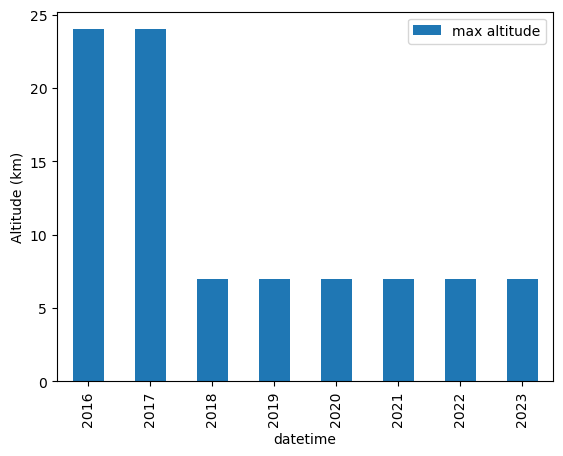

In [14]:
df_altitude_max = df.groupby('datetime').agg({'altitude': 'max'}).resample('Y').max()
df_altitude_max.index = df_altitude_max.index.year
df_altitude_max.rename(columns={'altitude': 'max altitude'}, inplace=True)
df_altitude_max.plot(
    kind='bar',
    ylabel='Altitude (km)',
)

<Axes: xlabel='datetime', ylabel='Altitude (km)'>

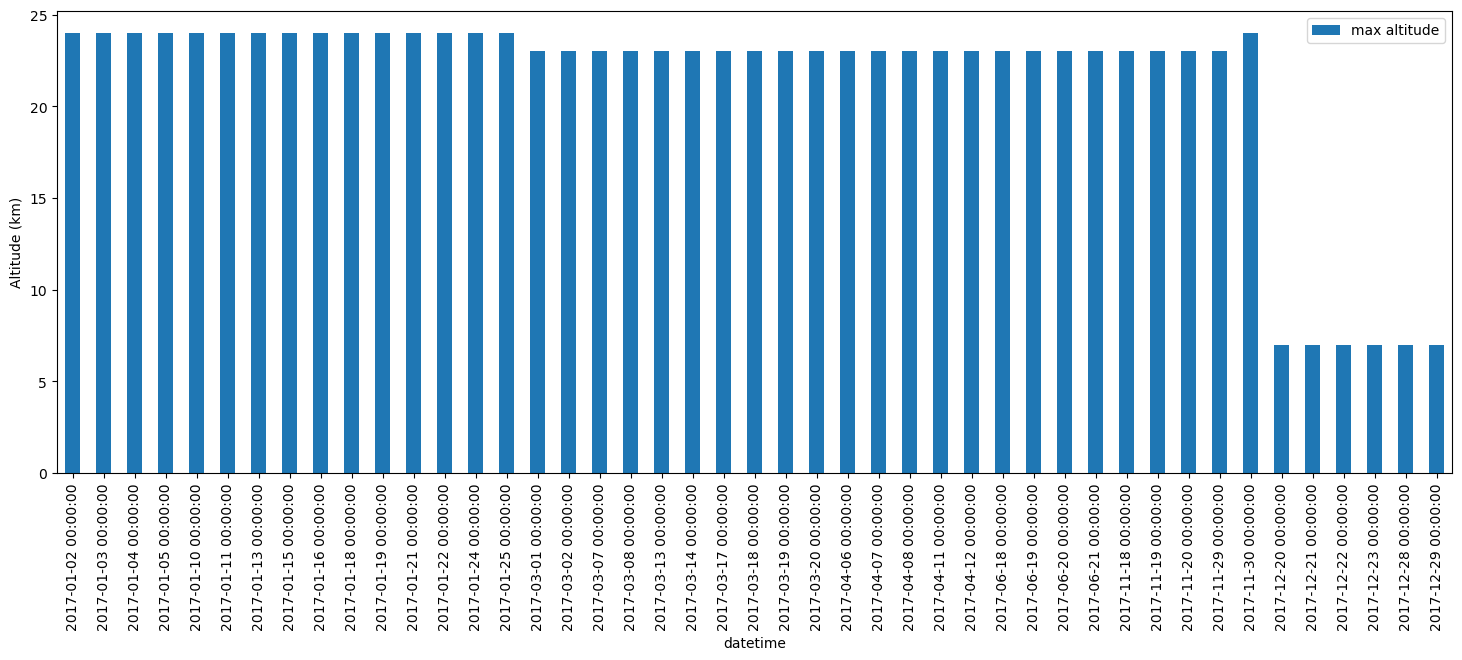

In [68]:
df_altitude_max = df.query('datetime.dt.year == 2017')
df_altitude_max = df_altitude_max.groupby('datetime').agg({'altitude': 'max'}).resample('D').max().dropna()
df_altitude_max.rename(columns={'altitude': 'max altitude'}, inplace=True)
df_altitude_max.plot(
    kind='bar',
    figsize=(18,6),
    ylabel='Altitude (km)',
    rot=90,
)

> #### Nota
> 
> A partir do mês de dezembro de 2017, a altitude máxima observada pelo radar foi reduzida de 24km para 7km.

### Quantidade de registros por data e altitude

In [4]:
df_count = df['datetime'].to_frame().groupby(df['datetime'].dt.date).count().rename(columns={'datetime': 'count'})
df_count

count
datetime           
2016-09-19  1001658
2016-09-20  1000011
2016-11-04  1001710
2016-11-05  1002241
2016-11-06  1002081
...             ...
2023-01-02   409632
2023-01-03   409632
2023-01-12   409632
2023-01-13   409632
2023-01-19   409632

[224 rows x 1 columns]

<Axes: xlabel='datetime'>

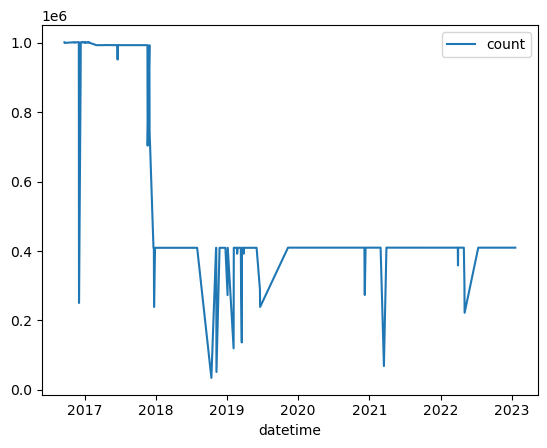

In [5]:
df_count.plot()

> #### Nota
> 
> O gráfico acima apresenta dois platôs, que são consistentes com o gráfico anterior que apresenta a redução da altitude máxima observada pelo radar (ocorrida em Dez 2017).
> 
> Apesar disso, determinadas datas apresentam uma quantidade total significativamente abaixo do seu respectivo platô.

In [33]:
df_count = df \
    .groupby(['altitude', pd.Grouper(key='datetime', freq='D')]) \
    .agg({'datetime': 'count'}) \
    .rename(columns={'datetime': 'count'})
df_count_mean = df_count.groupby('altitude').agg({'count': 'mean'}).rename(columns={'count': 'mean'})

In [69]:
deviation = 5/100
df_count \
    .reset_index() \
    .merge(df_count_mean, on='altitude') \
    .query(f'count > mean * (1 + {deviation}) | count < mean * (1 - {deviation})') \
    .query('altitude <= 7')

altitude   datetime  count          mean
10           0 2016-12-03  24929  96051.285714
11           0 2016-12-11  87264  96051.285714
53           0 2017-11-20  70618  96051.285714
55           0 2017-11-30  74783  96051.285714
59           0 2017-12-23  58310  96051.285714
...        ...        ...    ...           ...
1787         7 2023-01-02   1080  17756.214286
1788         7 2023-01-03   1080  17756.214286
1789         7 2023-01-12   1080  17756.214286
1790         7 2023-01-13   1080  17756.214286
1791         7 2023-01-19   1080  17756.214286

[1279 rows x 4 columns]

In [70]:
df_sample = df.query('datetime >= "2016-12-03" & datetime < "2016-12-04" & altitude == 0')
df_sample['datetime'].dt.hour.unique()

array([0, 1, 2, 3, 4, 5])

In [79]:
24929 / 6 * 24

99716.0

> #### Nota
> 
> Existem 1279 pares (data, altitude) com 5% à mais ou a menos de valores observados no espaço do que a média esperada.
> 
> Um valor observado é um valor de refletividade medido para um ponto no espaço (lat/lon) e um ponto no tempo.
> 
> Analisando os dados da data `2016-12-03` constata-se que apenas foram registradas as 6 primeiras horas do dia. Fazendo a proporção temos:
>     
> 24929 observações em 6 horas = 4154 observações por hora = 99716 observações por dia que é o valor próximo da média esperada por dia (96051).
> 
> ```python
> >>> 24929 / 6 * 24
> 99716.0
> ```

In [80]:
remote_path = os.path.join('landing', 'meshes', 'alertario', 'rainfall_zones', 'zonas_pluviometricas_rj_shapefile') 
local_dir = os.path.join('data', 'radar')
objects = DataLakeWrapper().download_files_recursively(remote_path, local_dir)
objects

['data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.cpg',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.dbf',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.prj',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.shp',
 'data/radar/landing/meshes/alertario/rainfall_zones/zonas_pluviometricas_rj_shapefile/Zonas_Pluviometricas.shx']

In [81]:
shapefile = [f for f in objects if f.endswith('.shp')][0]
rj_city = gpd.read_file(shapefile)
rj_city = rj_city.to_crs(epsg=4674)

def get_gdf(df):
    unique_coords = df[['latitude', 'longitude']].drop_duplicates()
    geometry = [Point(xy) for xy in zip(unique_coords['longitude'], unique_coords['latitude'])]
    gdf = gpd.GeoDataFrame(unique_coords, geometry=geometry, crs='EPSG:4674')
    return gdf

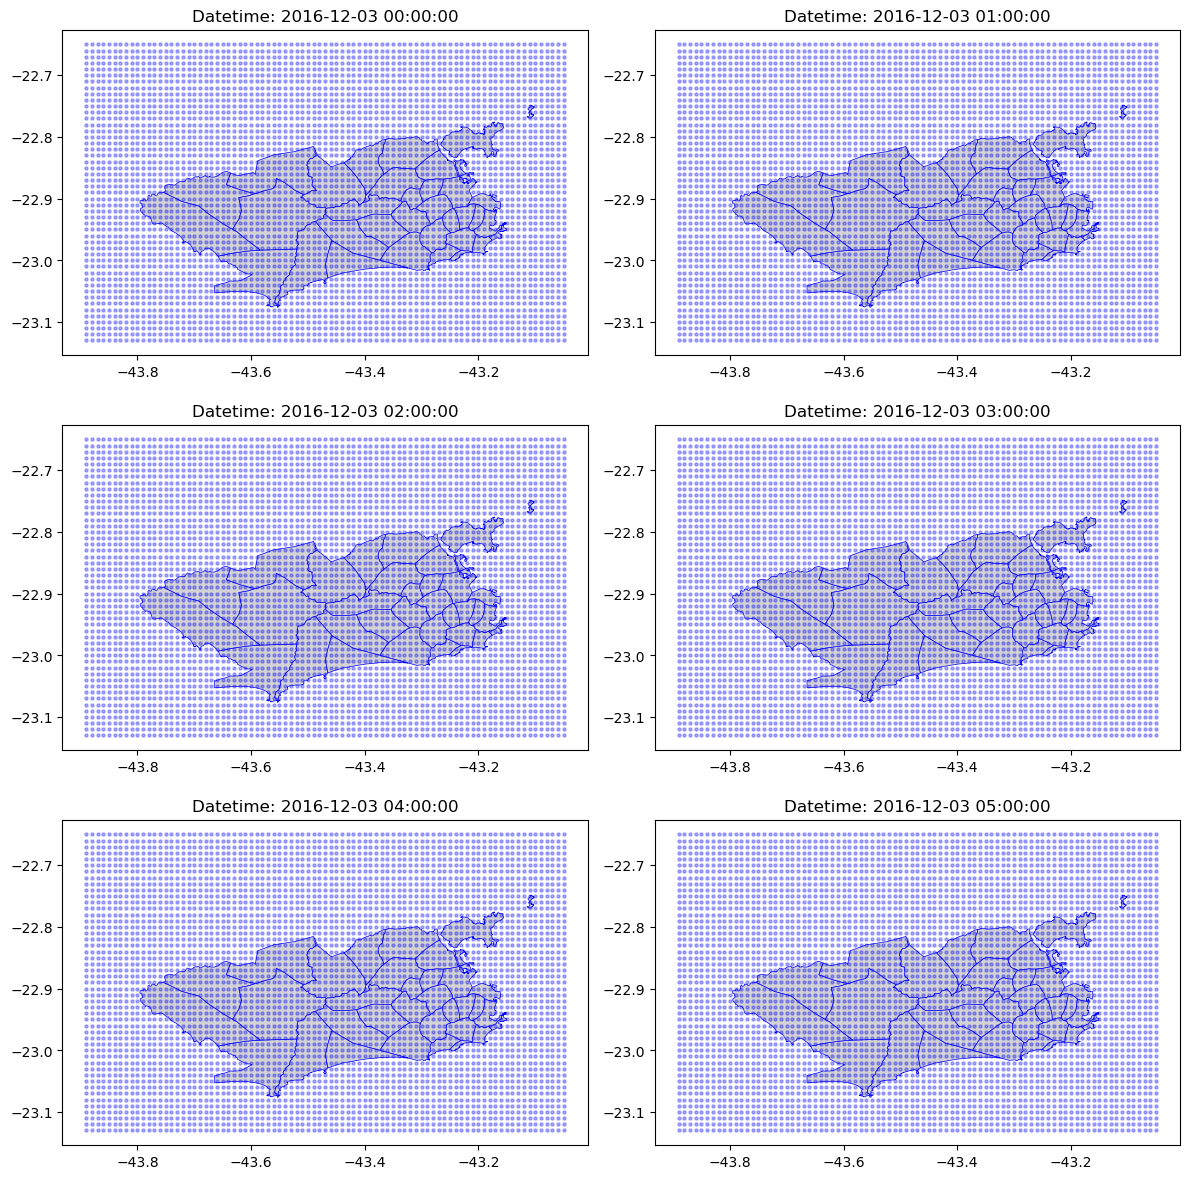

In [87]:
plt_args = {
    'color': 'lightgrey',
    'edgecolor': 'blue',
    'linewidth': 0.5,
}
times = pd.date_range('2016-12-03', periods=6, freq='H')
fig, axes = plt.subplots(3,2, figsize=(12,12))
for time, ax in zip(times, axes.flatten()):
    df_sample = df.query('datetime == @time')
    rj_city.plot(
        ax=ax,
        alpha=1,
        **plt_args
    )
    gdf = get_gdf(df_sample)
    gdf.plot(
        ax=ax, 
        markersize=5, 
        alpha=0.3,
        color='blue'
    )
    ax.set_title(f'Datetime: {time.strftime("%Y-%m-%d %H:%M:%S")}')
fig.tight_layout()

> #### Nota
> 
> O plot acima confirma que para os horários observados pelo radar na data `2016-12-03`, os pontos espaciais foram devidamente cobertos.
>
> É provável que a quantidade menor de observações para determinadas datas seja devido a falhas no equipamento em determinados horários.

## Análise de dados faltantes

In [69]:
df['horizontal_reflectivity_mean'].isnull().sum()

0

> #### Nota
> 
> Não há valores nulos para a refletividade média

## Análise de distribuição

In [7]:
def trim_axes(axs, n):
    """
    Reduce *axs* to *n* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[n:]:
        ax.remove()
    return axs[:n]


def plot_variable(df, variable, unit):
    altitudes = df['altitude'].unique()
    n_cols = 2
    n_rows = int(np.ceil(len(altitudes) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*2.5))
    axes = trim_axes(axes, len(altitudes))
    for altitude, ax in zip(altitudes, axes.flatten()):
        df.query('altitude == @altitude').set_index('datetime')[variable].plot(
            lw=0, 
            marker=".",
            ax=ax,
            xlabel='',
            ylabel=unit,
            title=f'Altitude: {altitude+1} km',
            legend=False,
        )
    fig.suptitle(f'Distribuição da variável {variable}', fontsize=16)
    fig.tight_layout()
    # fig.savefig(f'data/{variable}_distribution.png')


def plot_hist_box(df, variable, unit):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    df[variable].plot(
        kind='hist', 
        bins=100,
        ax=axes[0],
    )
    df[variable].plot(
        kind='box', 
        ax=axes[1],
        ylabel=unit,
    )
    axes[0].set_xlabel(unit)
    axes[0].set_ylabel('Frequência')
    fig.suptitle(f'Distribuição da variável {variable}', fontsize=16)
    fig.tight_layout()

In [5]:
variable = 'horizontal_reflectivity_mean'
unit='reflectivity (dBZ)'

df[[variable]].describe().applymap('{:,.2f}'.format)

horizontal_reflectivity_mean
count               120,303,117.00
mean                          6.83
std                          18.93
min                           0.00
25%                           0.00
50%                           0.00
75%                           0.34
max                         157.09

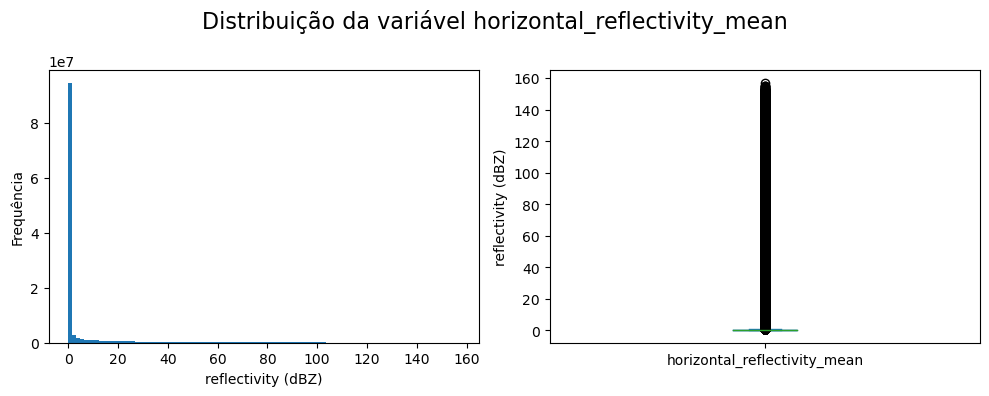

In [91]:
plot_hist_box(df, variable, unit)

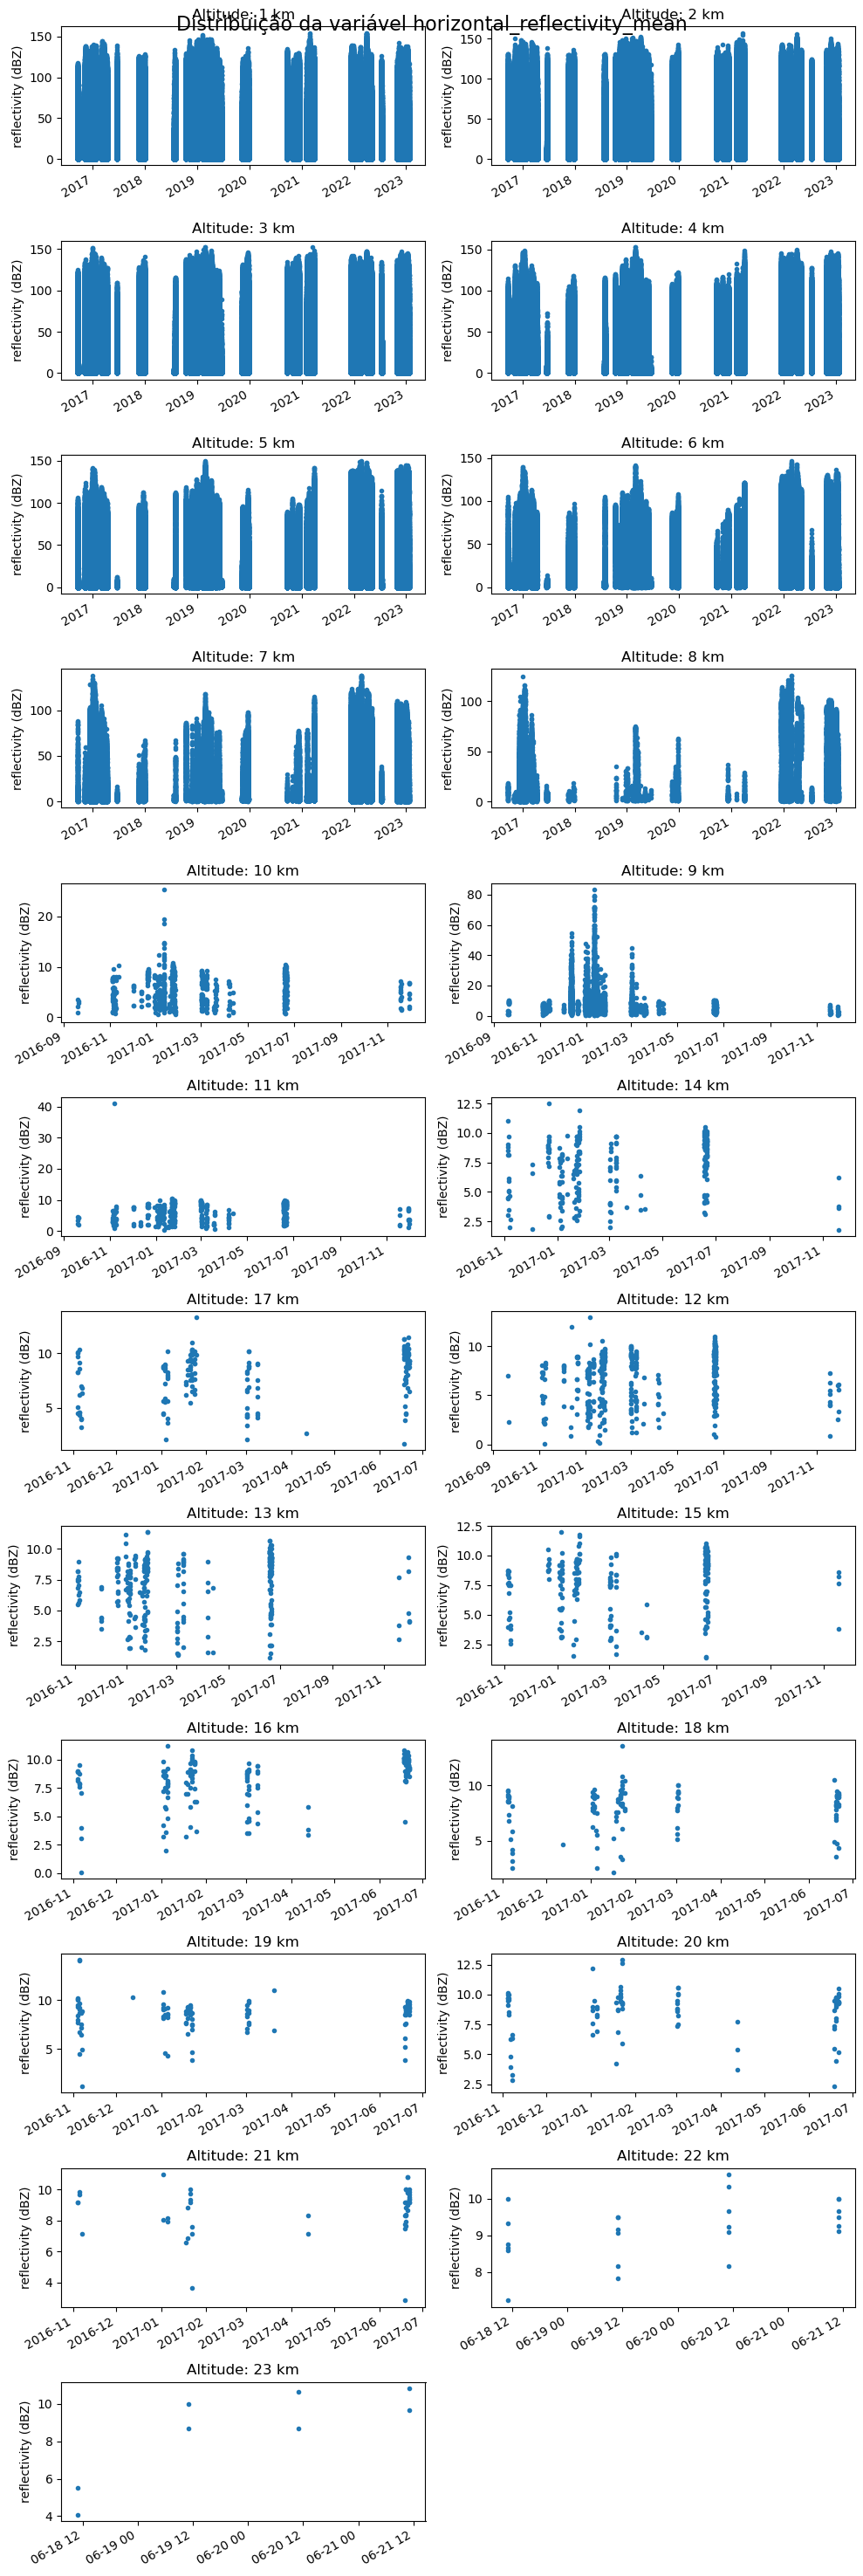

In [9]:
df = df[['altitude', 'datetime', variable]].query(f'{variable} > 0.0')
plot_variable(df, variable, unit)

> #### Nota
> 
> Pelo menos 50% dos valores de refletividade média são iguais à 0 dBZ e valores acima de 0.34 dBZ estão presentes somente no último quartil, chegando à um máximo de 157.09 dBZ.
> 
> Observa-se no intervalo de altitude [1,8] km refletividades máximas entre 100 dBZ e 150 dBZ. 
>
> A partir de 9 km observa-se refletividades máximas entre 10 dBZ e 12.5 dBZ, com exceção para 9 km e 11 km que registram máximas de 80 dBZ e 40 dBZ, respectivamente.
> 
> Como esperado, a quantidade de valores 0.0 é muito alta.